In [2]:
import pandas as pd
import numpy as np

import seaborn as sns
from matplotlib import pyplot as plt

RANDOM_SEED = 42
np.random.seed(RANDOM_SEED)

In [6]:
red_wines_file = "../wine_quality_data/winequality_red.csv"
df_wine_red = pd.read_csv(red_wines_file, sep=";")
white_wines_file = "../wine_quality_data/winequality_white.csv"
df_wine_white = pd.read_csv(white_wines_file, sep=";")

In [5]:
df_wine_red.head(7)

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   
5            7.4              0.66         0.00             1.8      0.075   
6            7.9              0.60         0.06             1.6      0.069   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   
5                 13.0                  40.0   0.9978  3.51       0.56   
6                 15.0                  59.0   0.9964  3.30       0.46   

   alcohol  quality  
0      9.4        5  
1      9.8        5  
2      9.8        5  
3      9.8        6  
4      9.4        5  
5      9.4        5  
6      9.4        5

In [4]:
# Combines 2 data sets in one 
full_data_frame = pd.concat([df_wine_red,df_wine_white],ignore_index=True)

In [5]:
full_data_frame.columns = full_data_frame.columns.str.lower().str.replace(' ', '_')

In [6]:
# Make target variable for qulity of wine -> quality> 5 -> Good (1) else Bad (0)  
full_data_frame['good_wine'] = (full_data_frame['quality'] > 5).values.astype(int)

In [7]:
full_data_frame.head (10)

fixed_acidity  volatile_acidity  citric_acid  residual_sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   
5            7.4              0.66         0.00             1.8      0.075   
6            7.9              0.60         0.06             1.6      0.069   
7            7.3              0.65         0.00             1.2      0.065   
8            7.8              0.58         0.02             2.0      0.073   
9            7.5              0.50         0.36             6.1      0.071   

   free_sulfur_dioxide  total_sulfur_dioxide  density    ph  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   
5                 13.0                  40.0   0.9978  3.51       0.56   
6                 15.0                  59.0   0.9964  3.30       0.46   
7                 15.0                  21.0   0.9946  3.39       0.47   
8                  9.0                  18.0   0.9968  3.36       0.57   
9                 17.0                 102.0   0.9978  3.35       0.80   

   alcohol  quality  good_wine  
0      9.4        5          0  
1      9.8        5          0  
2      9.8        5          0  
3      9.8        6          1  
4      9.4        5          0  
5      9.4        5          0  
6      9.4        5          0  
7     10.0        7          1  
8      9.5        7          1  
9     10.5        5          0

In [8]:
# we drop 'quality' column 
del full_data_frame['quality']

## Let's start with EDA

In [9]:
# Check clomuns data type
full_data_frame.dtypes

fixed_acidity           float64
volatile_acidity        float64
citric_acid             float64
residual_sugar          float64
chlorides               float64
free_sulfur_dioxide     float64
total_sulfur_dioxide    float64
density                 float64
ph                      float64
sulphates               float64
alcohol                 float64
good_wine                 int64
dtype: object

In [10]:
# check if we have empty values in clomuns 
full_data_frame.isnull().sum()

fixed_acidity           0
volatile_acidity        0
citric_acid             0
residual_sugar          0
chlorides               0
free_sulfur_dioxide     0
total_sulfur_dioxide    0
density                 0
ph                      0
sulphates               0
alcohol                 0
good_wine               0
dtype: int64

In [11]:
## check duplicate records 
print('Amount of duplicate records- ', full_data_frame.duplicated().sum())
full_data_frame[full_data_frame.duplicated()].head(10) 

Amount of duplicate records-  1179


fixed_acidity  volatile_acidity  citric_acid  residual_sugar  chlorides  \
4              7.4             0.700         0.00            1.90      0.076   
11             7.5             0.500         0.36            6.10      0.071   
27             7.9             0.430         0.21            1.60      0.106   
40             7.3             0.450         0.36            5.90      0.074   
65             7.2             0.725         0.05            4.65      0.086   
76             8.8             0.410         0.64            2.20      0.093   
91             8.6             0.490         0.28            1.90      0.110   
93             7.7             0.490         0.26            1.90      0.062   
102            8.1             0.545         0.18            1.90      0.080   
105            8.1             0.575         0.22            2.10      0.077   

     free_sulfur_dioxide  total_sulfur_dioxide  density    ph  sulphates  \
4                   11.0                  34.0   0.9978  3.51       0.56   
11                  17.0                 102.0   0.9978  3.35       0.80   
27                  10.0                  37.0   0.9966  3.17       0.91   
40                  12.0                  87.0   0.9978  3.33       0.83   
65                   4.0                  11.0   0.9962  3.41       0.39   
76                   9.0                  42.0   0.9986  3.54       0.66   
91                  20.0                 136.0   0.9972  2.93       1.95   
93                   9.0                  31.0   0.9966  3.39       0.64   
102                 13.0                  35.0   0.9972  3.30       0.59   
105                 12.0                  65.0   0.9967  3.29       0.51   

     alcohol  good_wine  
4        9.4          0  
11      10.5          0  
27       9.5          0  
40      10.5          0  
65      10.9          0  
76      10.5          0  
91       9.9          1  
93       9.6          0  
102      9.0          1  
105      9.2          0

In [12]:
print("Before:", full_data_frame.shape)
full_data_frame = full_data_frame.drop_duplicates().reset_index(drop=True)
print("After:", full_data_frame.shape)

Before: (6497, 12)
After: (5318, 12)


In [13]:
# check data frame statistics
full_data_frame.describe().T

count        mean        std      min      25%  \
fixed_acidity         5318.0    7.215523   1.319777  3.80000   6.4000   
volatile_acidity      5318.0    0.344171   0.168264  0.08000   0.2300   
citric_acid           5318.0    0.318522   0.147177  0.00000   0.2400   
residual_sugar        5318.0    5.049605   4.500645  0.60000   1.8000   
chlorides             5318.0    0.056700   0.036865  0.00900   0.0380   
free_sulfur_dioxide   5318.0   30.030463  17.804365  1.00000  16.0000   
total_sulfur_dioxide  5318.0  114.107747  56.783848  6.00000  74.0000   
density               5318.0    0.994536   0.002966  0.98711   0.9922   
ph                    5318.0    3.224639   0.160403  2.72000   3.1100   
sulphates             5318.0    0.533402   0.149753  0.22000   0.4300   
alcohol               5318.0   10.549222   1.185964  8.00000   9.5000   
good_wine             5318.0    0.626363   0.483814  0.00000   0.0000   

                            50%        75%        max  
fixed_acidity           7.00000    7.70000   15.90000  
volatile_acidity        0.30000    0.41000    1.58000  
citric_acid             0.31000    0.40000    1.66000  
residual_sugar          2.70000    7.50000   65.80000  
chlorides               0.04700    0.06600    0.61100  
free_sulfur_dioxide    28.00000   41.00000  289.00000  
total_sulfur_dioxide  116.00000  153.75000  440.00000  
density                 0.99466    0.99677    1.03898  
ph                      3.21000    3.33000    4.01000  
sulphates               0.51000    0.60000    2.00000  
alcohol                10.40000   11.40000   14.90000  
good_wine               1.00000    1.00000    1.00000

good_wine
1    3331
0    1987
Name: count, dtype: int64

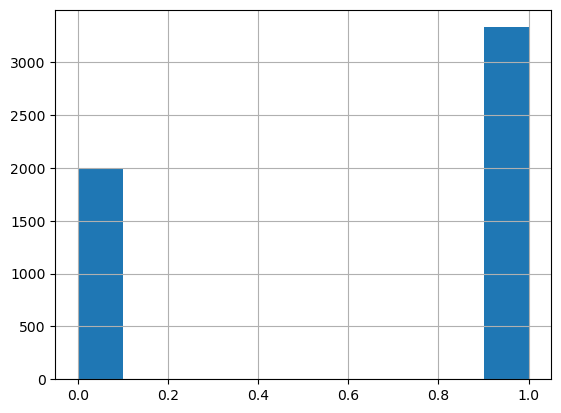

In [14]:
##check if our set is imbalanced?
full_data_frame['good_wine'].hist()
full_data_frame.good_wine.value_counts()

In [15]:
all_columns_array = full_data_frame.columns.values
target_column = 'good_wine'
all_columns_but_target = all_columns_array[all_columns_array != target_column]
all_columns_array, all_columns_but_target

(array(['fixed_acidity', 'volatile_acidity', 'citric_acid',
        'residual_sugar', 'chlorides', 'free_sulfur_dioxide',
        'total_sulfur_dioxide', 'density', 'ph', 'sulphates', 'alcohol',
        'good_wine'], dtype=object),
 array(['fixed_acidity', 'volatile_acidity', 'citric_acid',
        'residual_sugar', 'chlorides', 'free_sulfur_dioxide',
        'total_sulfur_dioxide', 'density', 'ph', 'sulphates', 'alcohol'],
       dtype=object))

In [16]:
skewness = full_data_frame[all_columns_but_target].skew()
kurtosis = full_data_frame[all_columns_but_target].kurtosis()

summary_stats = pd.DataFrame({
    "mean": full_data_frame[all_columns_but_target].mean(),
    "std": full_data_frame[all_columns_but_target].std(),
    "skewness": skewness,
    "kurtosis": kurtosis
})

summary_stats

mean        std  skewness   kurtosis
fixed_acidity           7.215523   1.319777  1.650055   4.587585
volatile_acidity        0.344171   0.168264  1.504115   2.861537
citric_acid             0.318522   0.147177  0.483817   2.581238
residual_sugar          5.049605   4.500645  1.706027   7.023430
chlorides               0.056700   0.036865  5.339077  48.265176
free_sulfur_dioxide    30.030463  17.804365  1.363772   9.528240
total_sulfur_dioxide  114.107747  56.783848  0.063667  -0.300811
density                 0.994536   0.002966  0.666033   8.713921
ph                      3.224639   0.160403  0.390358   0.431255
sulphates               0.533402   0.149753  1.809099   8.611916
alcohol                10.549222   1.185964  0.545866  -0.537745

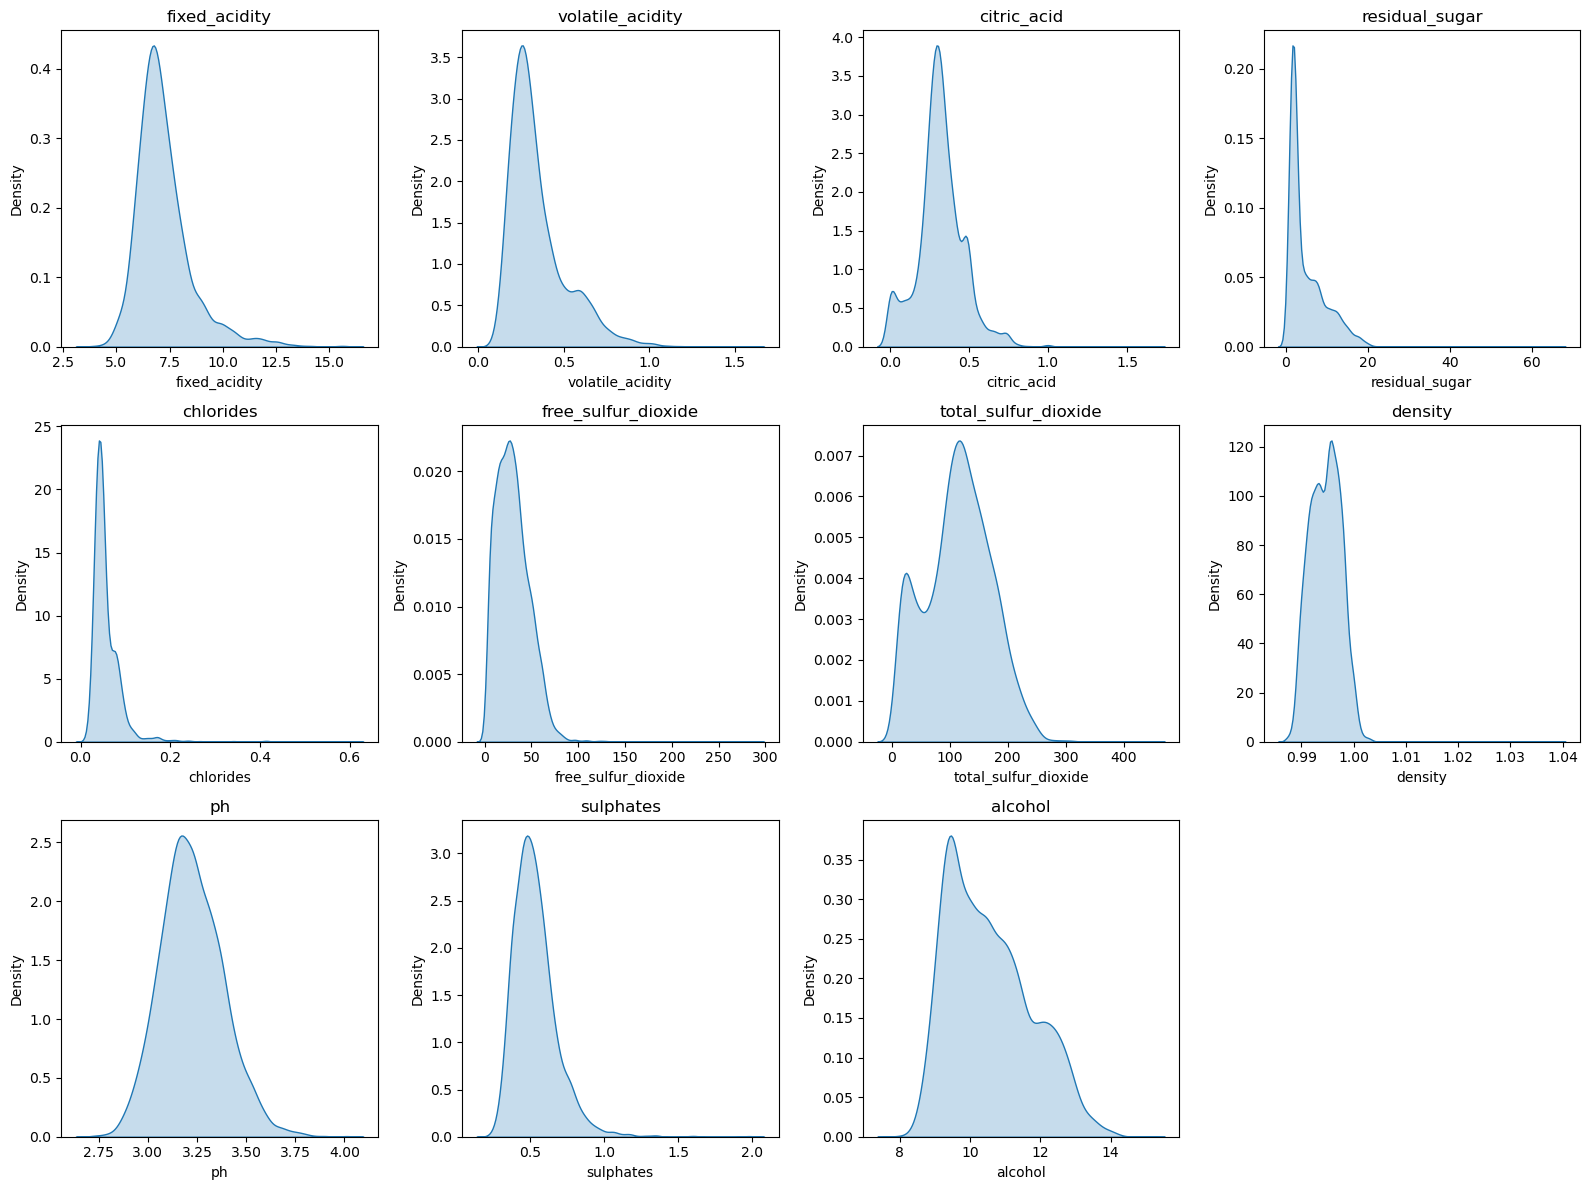

In [17]:
target = "good_wine"  # 
n_cols = 4
n_rows = int(np.ceil(len(all_columns_but_target) / n_cols))

plt.figure(figsize=(16, n_rows * 4))

for i, col in enumerate(all_columns_but_target, 1):
    plt.subplot(n_rows, n_cols, i)
    sns.kdeplot(full_data_frame[col], fill=True)
    plt.title(col)
    plt.tight_layout()

plt.show()    

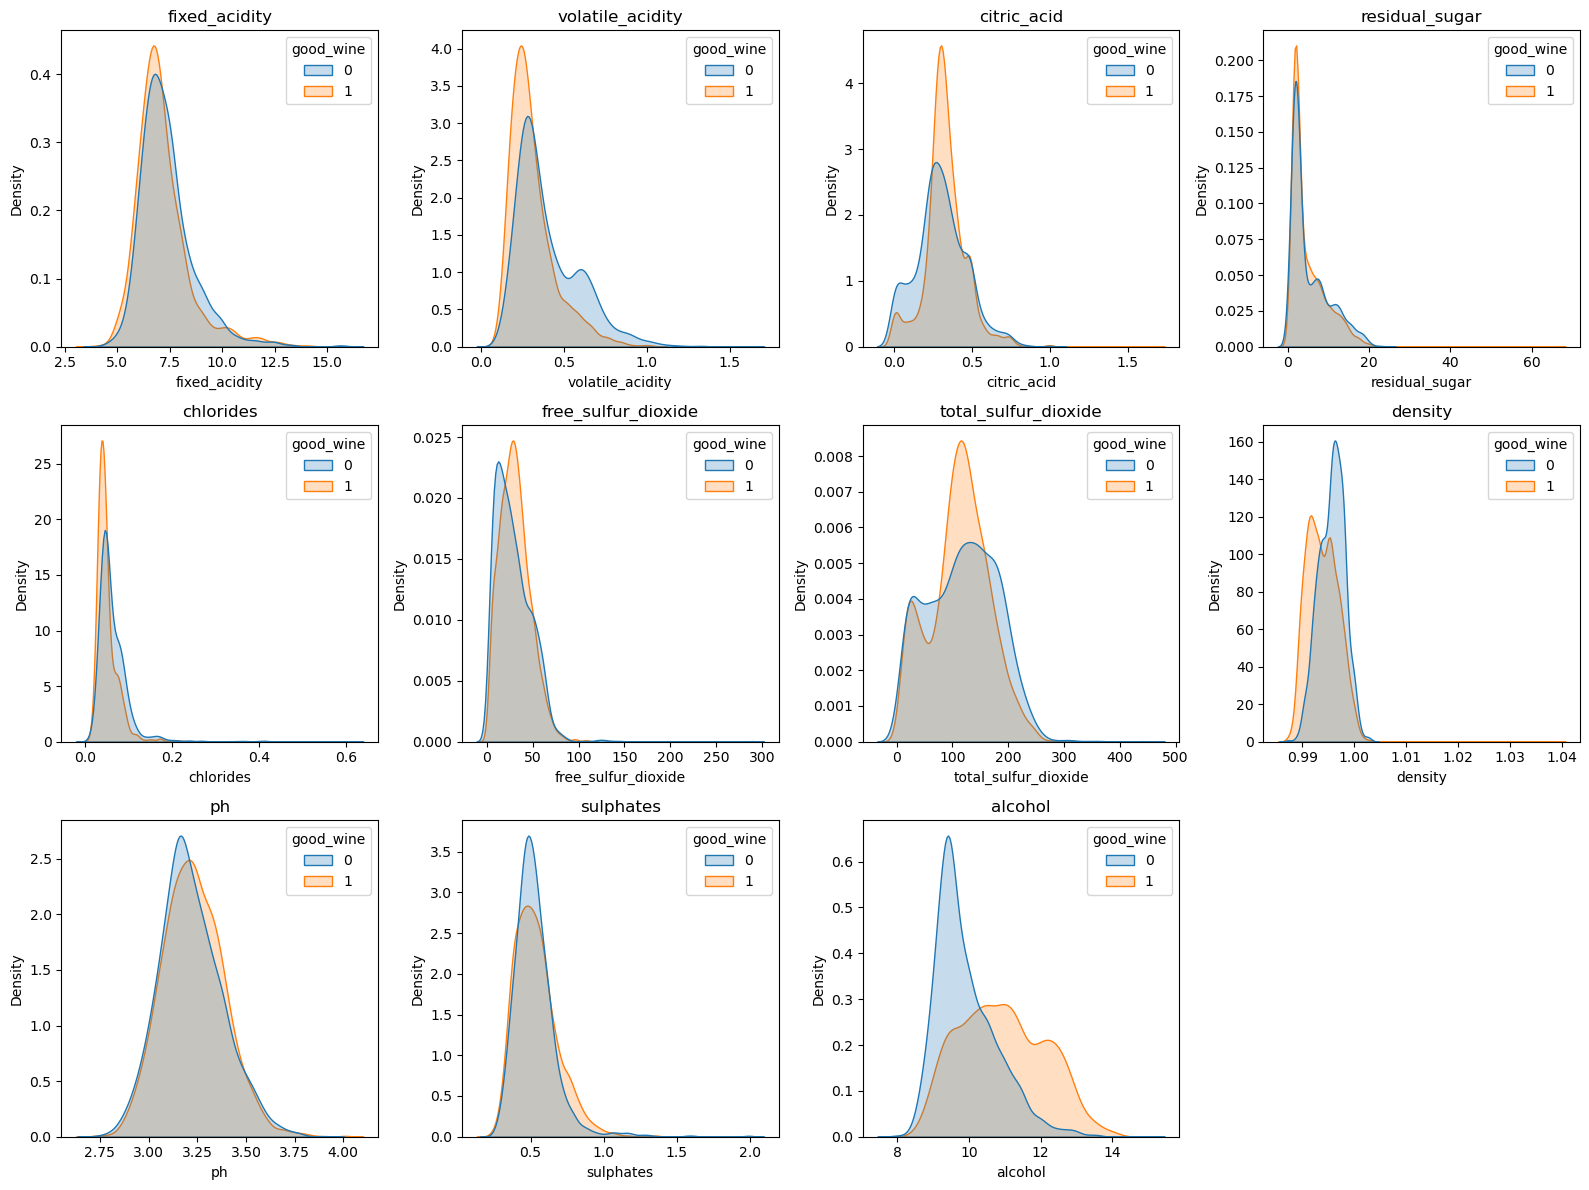

In [18]:
plt.figure(figsize=(16, n_rows * 4))

for i, col in enumerate(all_columns_but_target, 1):
    plt.subplot(n_rows, n_cols, i)
    sns.kdeplot(data=full_data_frame, x=col, hue="good_wine", fill=True, common_norm=False)
    plt.title(col)
    plt.tight_layout()

plt.show()

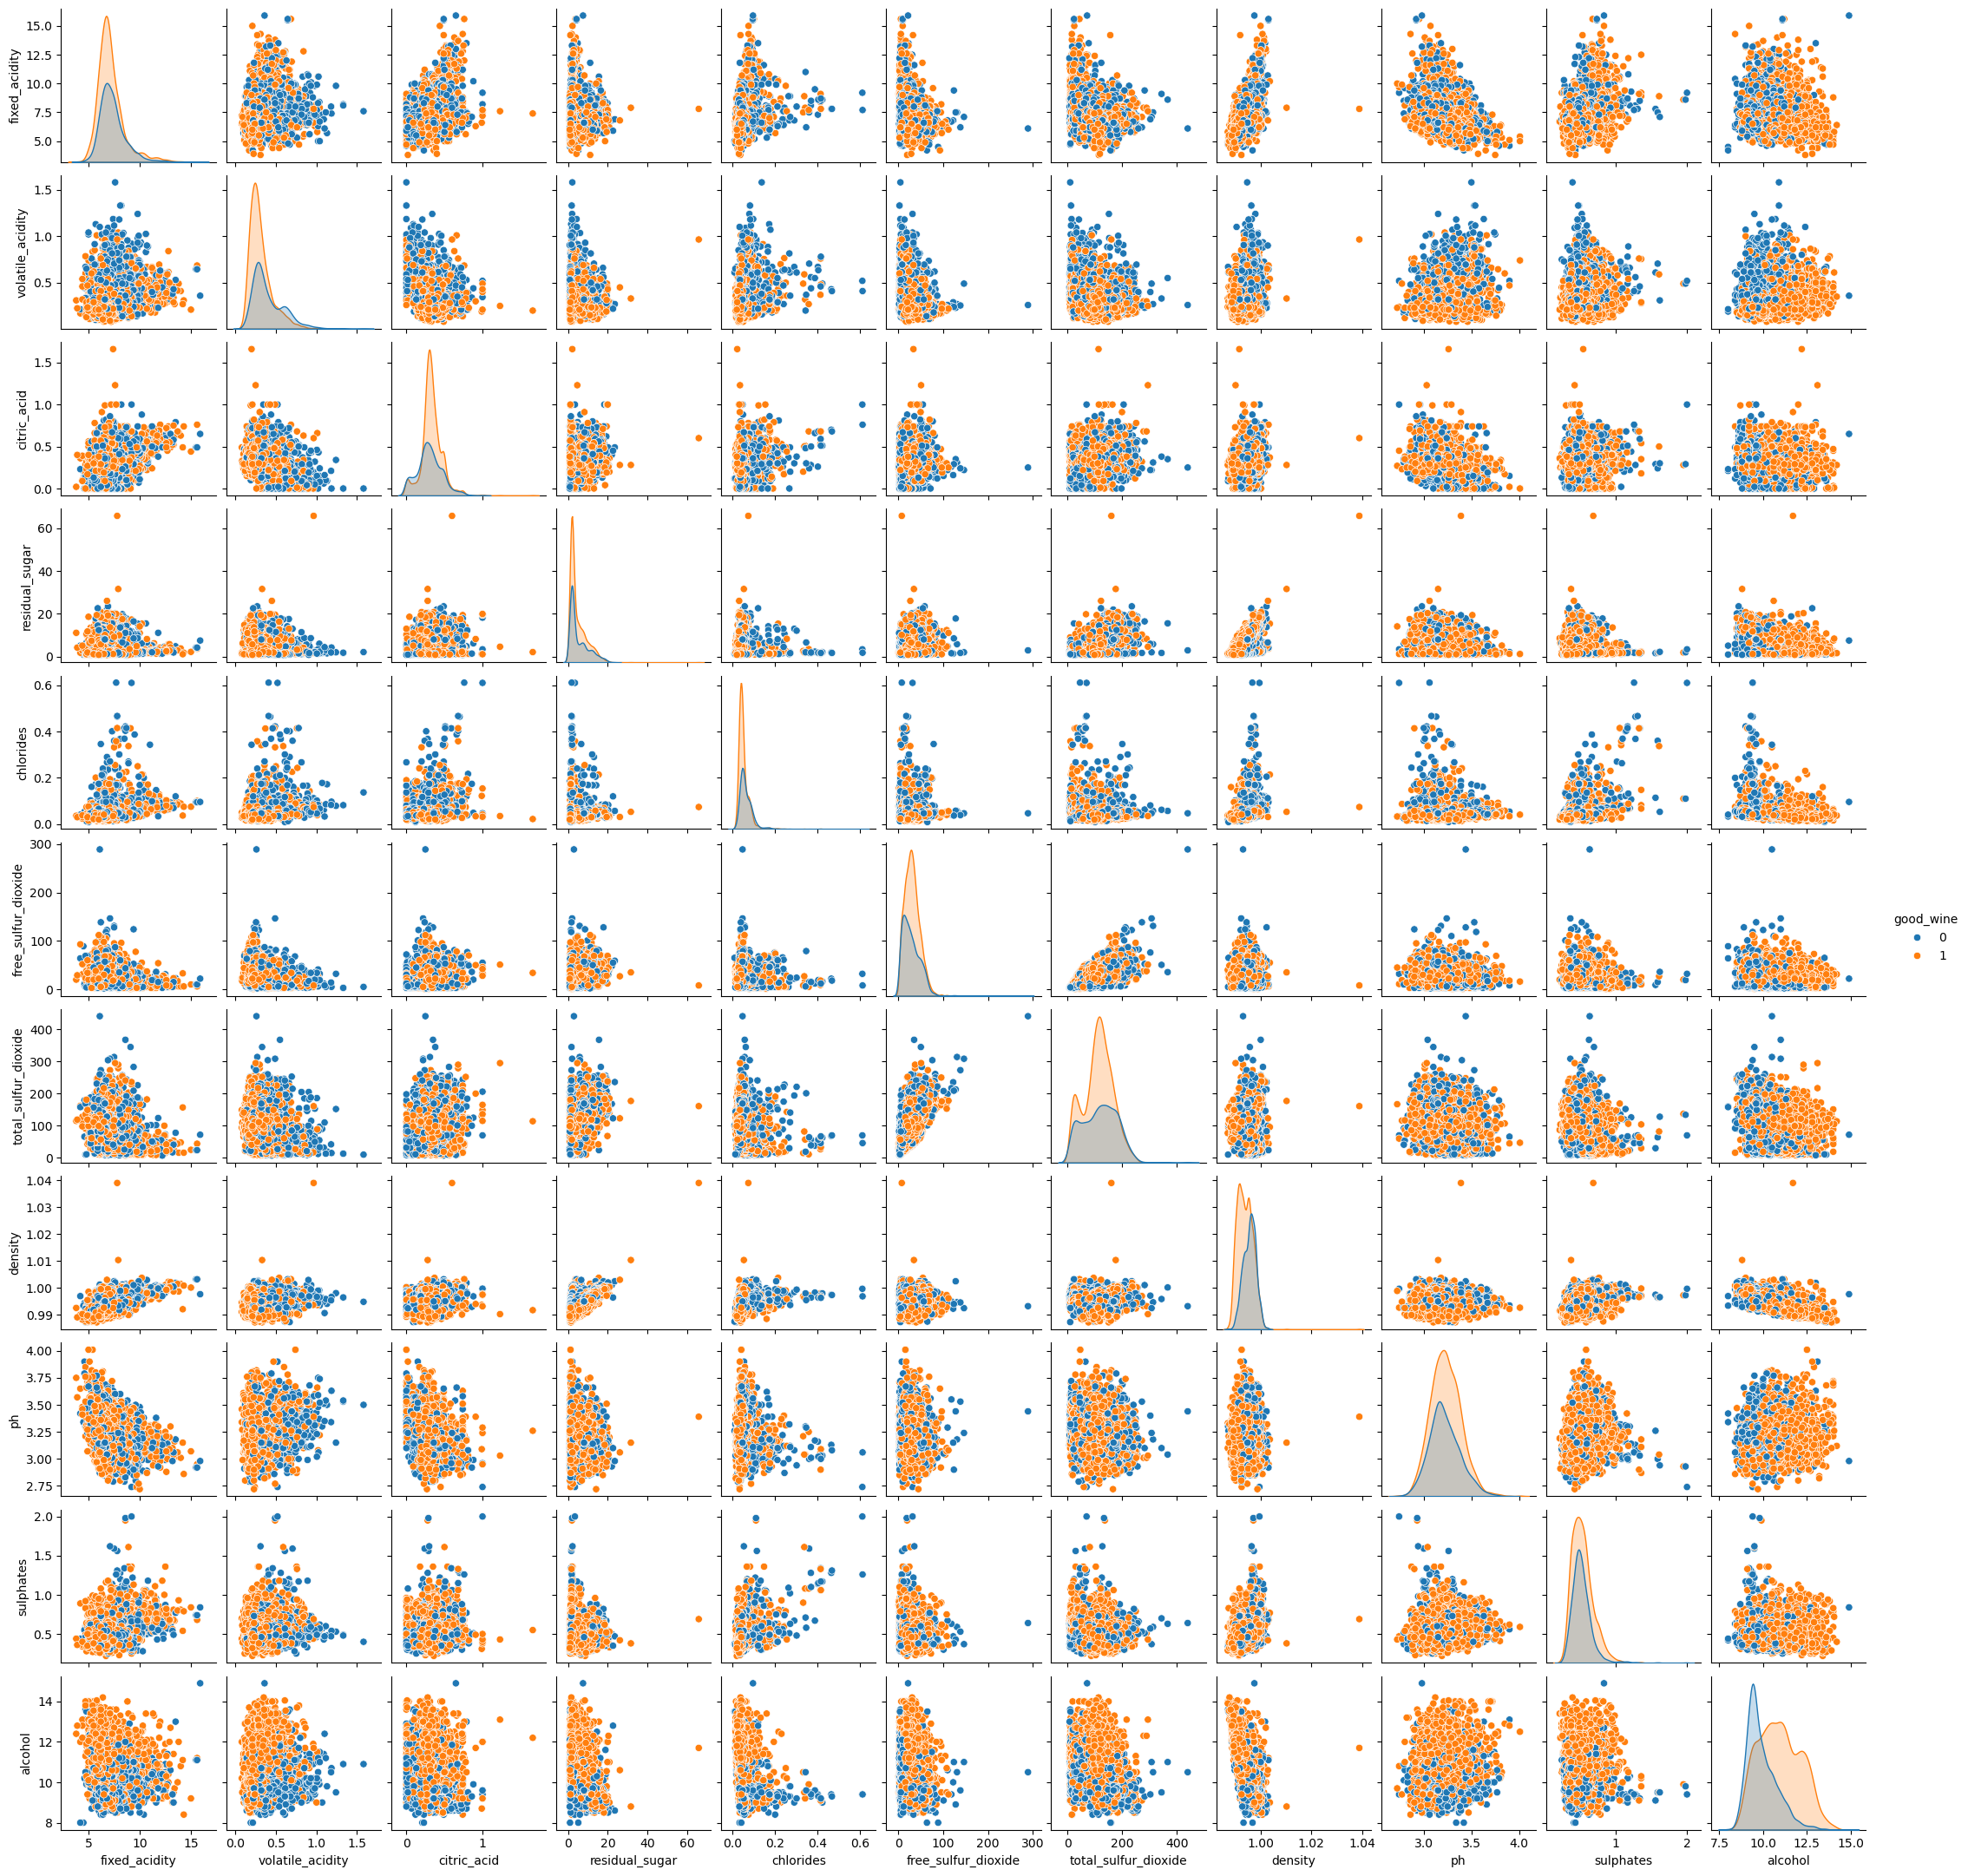

In [19]:
sns.pairplot(full_data_frame, height=2, hue="good_wine", vars=all_columns_but_target)
plt.show()

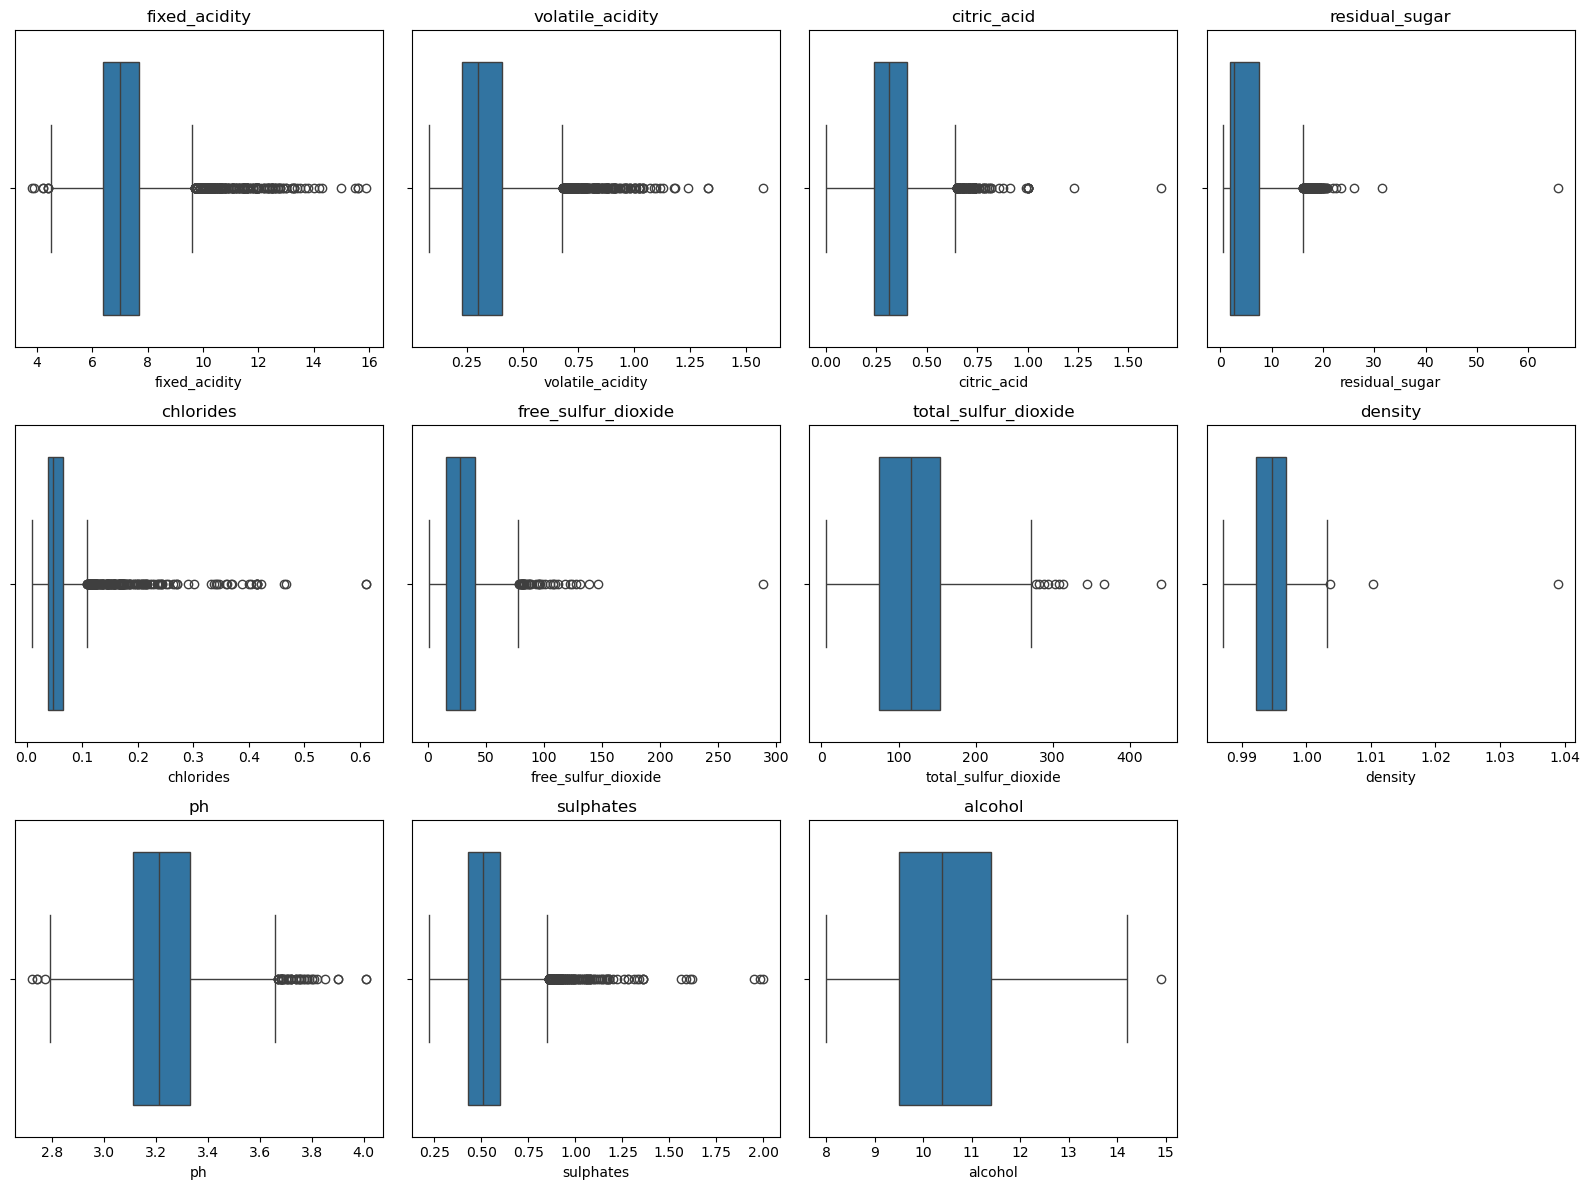

In [20]:
n_cols = 4
n_rows = int(np.ceil(len(all_columns_but_target) / n_cols))

plt.figure(figsize=(16, n_rows * 4))

for i, col in enumerate(all_columns_but_target, 1):
    plt.subplot(n_rows, n_cols, i)
    sns.boxplot(x=full_data_frame[col])
    plt.title(col)
    plt.tight_layout()

plt.show()

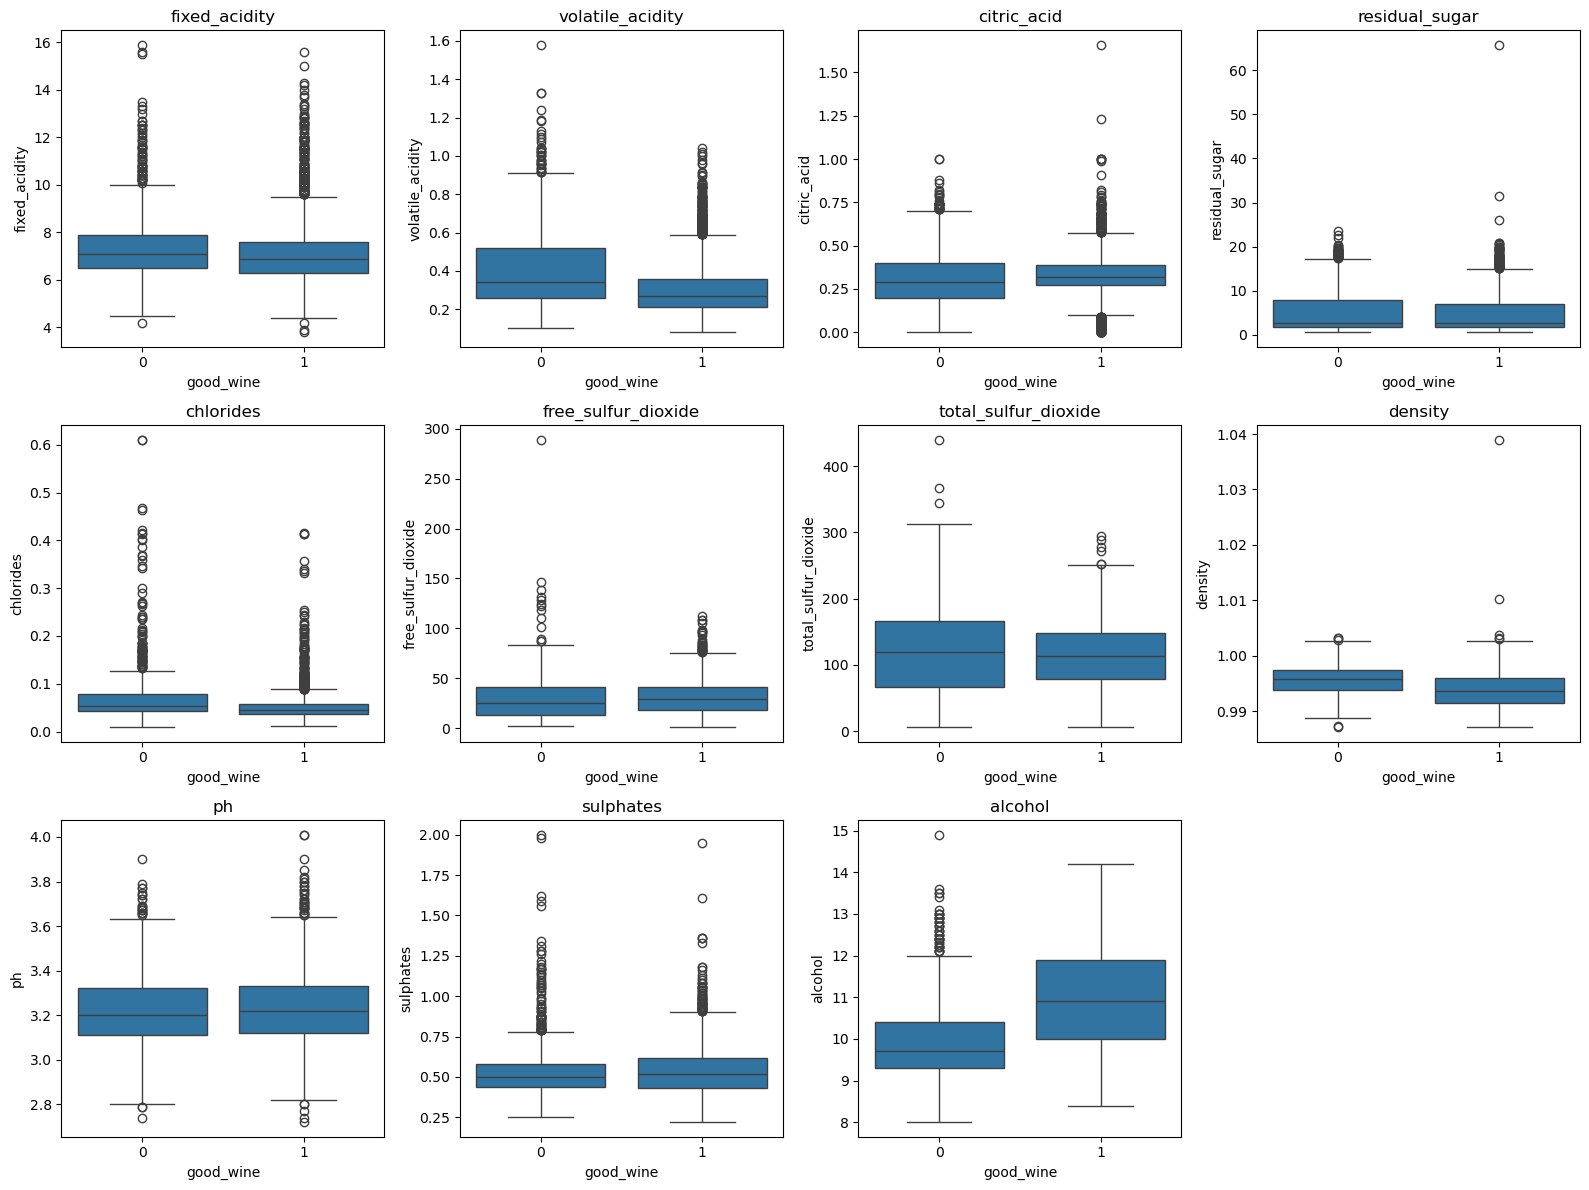

In [21]:
n_cols = 4
n_rows = int(np.ceil(len(all_columns_but_target) / n_cols))

plt.figure(figsize=(16, n_rows * 4))

for i, col in enumerate(all_columns_but_target, 1):
    plt.subplot(n_rows, n_cols, i)
    sns.boxplot(data=full_data_frame, x="good_wine", y=col)
    plt.title(col)
    plt.tight_layout()

plt.show()

In [22]:
full_data_frame.corr()['good_wine'].sort_values()

density                -0.287191
volatile_acidity       -0.270158
chlorides              -0.187353
fixed_acidity          -0.072166
total_sulfur_dioxide   -0.049269
residual_sugar         -0.047888
sulphates               0.035561
ph                      0.036225
free_sulfur_dioxide     0.047096
citric_acid             0.086933
alcohol                 0.414295
good_wine               1.000000
Name: good_wine, dtype: float64

In [23]:
full_data_frame.groupby(by='good_wine')[all_columns_but_target].mean().T

good_wine                      0           1
fixed_acidity           7.338827    7.141969
volatile_acidity        0.403022    0.309065
citric_acid             0.301958    0.328403
residual_sugar          5.328636    4.883158
chlorides               0.065642    0.051367
free_sulfur_dioxide    28.944892   30.678025
total_sulfur_dioxide  117.729743  111.947163
density                 0.995639    0.993879
ph                      3.217116    3.229126
sulphates               0.526507    0.537514
alcohol                 9.913117   10.928670

<Axes: >

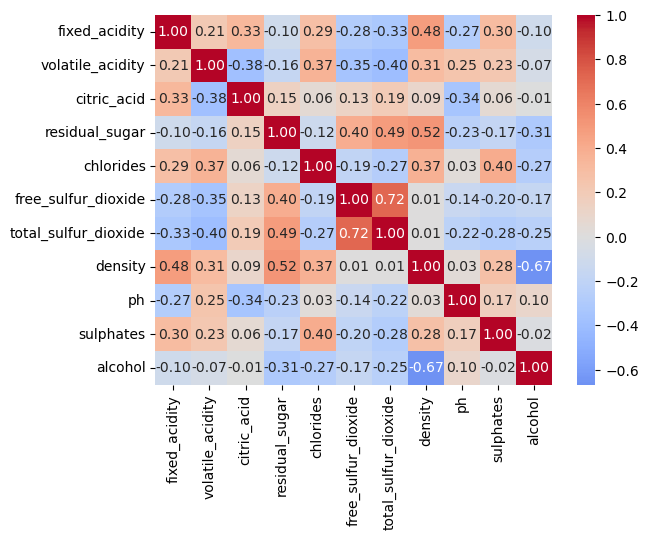

In [24]:
corr = full_data_frame[all_columns_but_target].corr()
sns.heatmap(corr, annot=True, fmt=".2f", cmap="coolwarm", center=0)

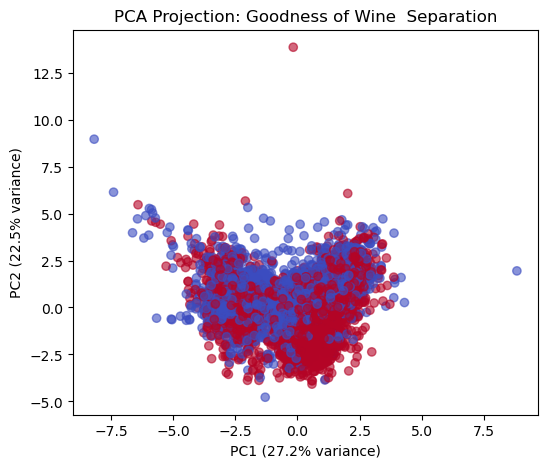

In [25]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
df = full_data_frame
X = full_data_frame[all_columns_but_target]
y = full_data_frame["good_wine"]   

# Standardize features (important for PCA)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Run PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Visualize
plt.figure(figsize=(6,5))
plt.scatter(X_pca[:,0], X_pca[:,1], c=y, cmap="coolwarm", alpha=0.6)
plt.xlabel(f"PC1 ({pca.explained_variance_ratio_[0]*100:.1f}% variance)")
plt.ylabel(f"PC2 ({pca.explained_variance_ratio_[1]*100:.1f}% variance)")
plt.title("PCA Projection: Goodness of Wine  Separation")
plt.show()

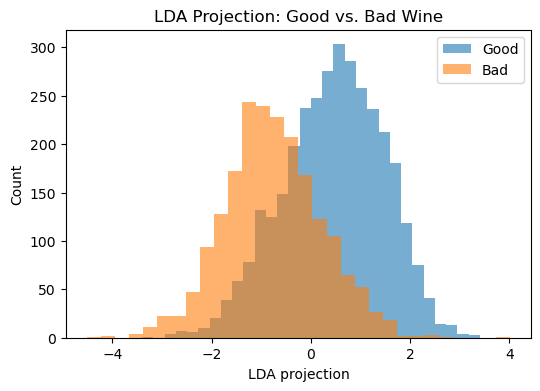

In [26]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
import numpy as np

lda = LinearDiscriminantAnalysis(n_components=1)
X_lda = lda.fit_transform(X_scaled, y)

plt.figure(figsize=(6,4))
plt.hist(X_lda[y==1], bins=30, alpha=0.6, label="Good", color="tab:blue")
plt.hist(X_lda[y==0], bins=30, alpha=0.6, label="Bad", color="tab:orange")
plt.xlabel("LDA projection")
plt.ylabel("Count")
plt.title("LDA Projection: Good vs. Bad Wine")
plt.legend()
plt.show()

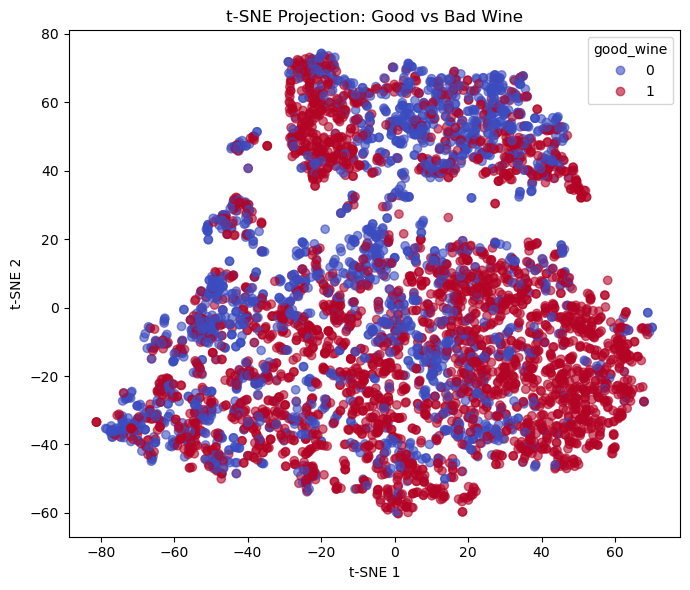

In [27]:
from sklearn.manifold import TSNE
# Optional: reduce to 10 PCs first for t-SNE speed/stability
pca_tsne = PCA(n_components=10, random_state=42)
X_pca_tsne = pca_tsne.fit_transform(X_scaled)

# ----- t-SNE -----
tsne = TSNE(
    n_components=2,
    perplexity=30,
    learning_rate="auto",
    init="random",
    random_state=42
)
X_tsne = tsne.fit_transform(X_pca_tsne)

# ----- Plot t-SNE -----
plt.figure(figsize=(7, 6))
scatter = plt.scatter(
    X_tsne[:, 0],
    X_tsne[:, 1],
    c=y,
    cmap="coolwarm",
    alpha=0.6
)
plt.xlabel("t-SNE 1")
plt.ylabel("t-SNE 2")
plt.title("t-SNE Projection: Good vs Bad Wine")
plt.legend(*scatter.legend_elements(), title=target)
plt.tight_layout()
plt.show()


## Summary of Exploratory Data Analysis Summary for Wine Quality Classification

#### 1. Dataset Overview
 The dataset contains chemical measurements of red and white wines combined into a single table.
 
 The target variable is good_wine:
 - 0 → low/mid-quality wine 
 - 1 → good-quality wine
 
 All features are numeric and continuous.
 
 Duplicate Records:
 - A total of 1,179 duplicate records were identified and removed.
 - The dataset after duplicate removal is cleaner and avoids artificial weighting of certain data points.
 
 Missing Values:
  - No missing values were detected.
#### 2. Class Imbalance


The dataset is moderately imbalanced:
 - Class 0 (bad/average wines): -> 1987 samples
 - Class 1 (good wines): -> 3331 samples

This requires:

  - Stratified train/test splitting
  - Shuffling, because red and white wines appear in blocks in the original dataset.
#### 3. Univariate Distributions (PDFs)
 The probability density functions reveal:

Many features are right-skewed, such as:
 - residual_sugar
 - chlorides
 - sulphates
 - free_sulfur_dioxide
 - total_sulfur_dioxide

pH, fixed_acidity, and citric_acid show more compact, near-normal distributions.
Density, despite having a very small numerical range (0.987–1.039), has meaningful variation relative to wine chemistry (sugar/alcohol content). As result density should NOT be removed even though the standard deviation is small (≈0.002).
Alcohol shows a clear difference in distribution between good and bad wines since higher-quality wines tend to have higher alcohol content.

#### 4. Outlier Analysis

Many features contain expected chemical outliers (e.g., very sweet wines, high sulfur wines).
Outliers differ by class (e.g., good wines show more high-alcohol outliers).

Outliers contain useful signal and should not be removed.
 - Tree-based models naturally handle outliers well.
 - For linear/distance models, scaling will mitigate their influence.

#### 5. Correlation Analysis
The correlation matrix shows:
 - Strong or notable correlations
    - free_sulfur_dioxide <-> total_sulfur_dioxide (0.72)
    - residual_sugar <-> density (0.52)
    - alcohol <-> density (≈ −0.67)
    - chlorides <-> density (≈ 0.37)
      
  - Moderate correlations
    - volatile_acidity <-> citric_acid (−0.38)
    - fixed_acidity <-> density (0.48)


  Multicollinearity exists, but:
   - It does not harm tree models.
   - It does affect logistic regression interpretability -> scaling should be use as well as possibly VIF checks recommended if we select as final model for production purpouse.

Strong correlations confirm density’s importance; it captures sugar + alcohol interactions.
#### 6. PCA (Unsupervised Linear Projection)
 - PC1 explains ~27% of variance
 - PC2 explains ~22% of variance

The PCA projection shows:
 - A large, dense overlapping cloud
 - No clear separation between good vs. bad wine

Interpretation:
 - The classes are not linearly separable in the original feature space.
#### 7. LDA (Supervised Linear Projection)
 LDA produces a single discriminant dimension. Distributions for the two classes overlap heavily, but with noticeable mean shift.

 Interpretation:
 - Some linear separability exists.
 - However, logistic regression will have limited classification power. 
#### 8. t-SNE (Nonlinear Embedding)
 
t-SNE reveals several local clusters, but:
 - Red and blue classes are mixed in all regions.
 - No visually distinct clusters emerge.

Interpretation:
 - Nonlinear structure exists, but still not strongly class-separable.
 - Confirms this wine quality classification is inherently noisy and subtle.
####  9. Key Insights About Class Separability
  Across all dimensionality-reduction methods:
  - No single feature can separate good vs. bad wines.
  - The classification boundary is weak and highly nonlinear.
  - Feature interactions are important.
  - Alcohol provides the strongest single-feature signal.
  - Other chemical measurements contribute only when combined.
  - Tree-based models (RandomForest, XGBoost) are expected to outperform logistic regression.
#### 10. Modeling Implications (Based on EDA)

Logistic Regression:
 - Requires scaling
 - Sensitive to multicollinearity
 - Limited separation -> expect modest performance

Tree-Based Models:
 - Handle multicollinearity, outliers, scaling differences
 - Capture nonlinear feature interactions
 - Expected to perform best 
#### Overall Conclusion
Wine quality classification is challenging due to:
 - Highly overlapping feature distributions
 - Nonlinear subtle interactions
 - No clear structure in PCA or t-SNE
 - Only modest linear separation (LDA)
 - No single dominant predictor (other than alcohol)
   
However:
 - Tree-based models will still extract meaningful nonlinear patterns.
 - EDA confirms the need for stratified splitting, scaling for linear models, and careful model selection.
 - Density, despite low numerical variance, carries real chemical signal and should be kept.

## Model Training

In [28]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score
from sklearn.metrics import f1_score
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import StratifiedKFold, cross_val_score

In [29]:
df_train_full, df_test = train_test_split(full_data_frame, 
                                          test_size=0.2, 
                                          random_state = RANDOM_SEED, 
                                          stratify=full_data_frame.good_wine,
                                          shuffle=True)

In [30]:
df_train, df_val =  train_test_split(df_train_full, 
                                          test_size=0.25, 
                                          random_state = RANDOM_SEED, 
                                          stratify=df_train_full.good_wine,
                                          shuffle=True)

In [31]:
X_test = df_test[all_columns_but_target]
y_test = df_test[target_column]

X_train =  df_train[all_columns_but_target]
y_train = df_train[target_column]

X_val = df_val[all_columns_but_target]
y_val = df_val[target_column]


In [32]:
len(X_test),len(X_train), len(X_val) , len(X_test)+len(X_train)+ len(X_val)== len(full_data_frame)

(1064, 3190, 1064, True)

### LogisticRegression as base model

In [33]:
#Train the simplest base model

scaler_log = StandardScaler()
X_train_scaled   = scaler_log.fit_transform(X_train)
X_val_scaled_log = scaler_log.transform(X_val)

logreg = LogisticRegression(max_iter=1000, solver='liblinear', C=1.0, random_state = RANDOM_SEED)
logreg.fit(X_train_scaled, y_train)

auc_train = roc_auc_score(y_train, logreg.predict_proba(X_train_scaled)[:,1])
auc_val   = roc_auc_score(y_val, logreg.predict_proba(X_val_scaled_log)[:,1])

# used default treshold as 0.5 ! 
f1_train = f1_score(y_train, (logreg.predict_proba(X_train_scaled)[:,1]>= 0.5).astype(int))
f1_val   = f1_score(y_val,  (logreg.predict_proba(X_val_scaled_log)[:,1] >= 0.5).astype(int))
print('Train auc', auc_train, 'Validation auc', auc_val)
print('Train f1', f1_train, 'Validation f1', f1_val)

Train auc 0.8059628420366676 Validation auc 0.8138361549703738
Train f1 0.8027999034516051 Validation f1 0.8157706093189964


In [34]:
#make piline for cross validation and parameter tuning
linear_log_regressor = make_pipeline(
    StandardScaler(), LogisticRegression(max_iter=1000, solver='liblinear', C=1.0, random_state = RANDOM_SEED)
)

In [35]:
#Let's check our model result use cross validation 

In [36]:
X = df_train_full[all_columns_but_target]
y = df_train_full[target_column]

cv = StratifiedKFold(
    n_splits=5,
    shuffle=True,
    random_state=RANDOM_SEED
)

cv_scores = cross_val_score(
    linear_log_regressor,
    X,
    y,
    cv=cv,
    scoring="roc_auc",
    n_jobs=-1
)
cv_scores_f1 = cross_val_score(
        linear_log_regressor,
        X,
        y,
        cv=cv,
        scoring="f1",
        n_jobs=-1
    )
print("CV AUC scores:", cv_scores)
print("Mean CV AUC:", cv_scores.mean())
print("Std CV AUC:", cv_scores.std())
print("Mean CV F1:", cv_scores_f1.mean())
print("Std CV F1:", cv_scores_f1.std())

CV AUC scores: [0.80989298 0.78126069 0.82467226 0.79995752 0.80667728]
Mean CV AUC: 0.8044921460235009
Std CV AUC: 0.014152342375735025
Mean CV F1: 0.8014708488106844
Std CV F1: 0.006151006732087891


As it could be seen our logistic regression baseline is:

Not overfitting
  - Train AUC (0.806) ≈ Val AUC (0.814) ≈ CV AUC (0.804)

Not underfitting
 - AUC & F1 ~0.80 is strong for a linear model on this dataset.

Stable
 - CV std < 0.014 for AUC & std < 0.006 -> very consistent across folds.

Reliable
 - It captured about as much linear signal as possible.

Well-designed
 - no leakage, perfect structure.

In [37]:
# Let's try to find the best C value which could improve model
C = [0.000001, 0.001, 0.01,  1, 10, 100]
scores = []

for c in C:
    X = df_train_full[all_columns_but_target]
    y = df_train_full[target_column]

    cv = StratifiedKFold(
        n_splits=5,
        shuffle=True,
        random_state=RANDOM_SEED
    )
    linear_log_regressor = make_pipeline(
        StandardScaler(), LogisticRegression(max_iter=1000, solver='liblinear', C=c, random_state = RANDOM_SEED)
    )
    cv_scores = cross_val_score(
        linear_log_regressor,
        X,
        y,
        cv=cv,
        scoring="roc_auc",
        n_jobs=-1
    )
    cv_scores_f1 = cross_val_score(
        linear_log_regressor,
        X,
        y,
        cv=cv,
        scoring="f1",
        n_jobs=-1
    )
    print("C parameter = :", c)
    print("CV AUC scores:", cv_scores)
    print("CV F1 scores:", cv_scores_f1)
    
    cv_scores_mean = cv_scores.mean()
    cv_scores_f1_mean = cv_scores_f1.mean()
    
    print("Mean CV AUC:", cv_scores_mean)
    print("Mean CV F1:", cv_scores_f1_mean)
    
    cv_scores_std = cv_scores.std()
    cv_scores_f1_std = cv_scores_f1.std()
    
    print("Std CV AUC:", cv_scores_std)
    print("Std CV F1:", cv_scores_f1_std)
    
    scores.append((np.round(c,3), np.round(cv_scores_mean,3), np.round(cv_scores_std, 3), np.round(cv_scores_f1_mean,3), np.round(cv_scores_f1_std, 3)))
    

C parameter = : 1e-06
CV AUC scores: [0.76190898 0.73928871 0.78554403 0.76331906 0.75758311]
CV F1 scores: [0.74117647 0.73217726 0.76818623 0.76235741 0.7519084 ]
Mean CV AUC: 0.7615287760016368
Mean CV F1: 0.7511611545833506
Std CV AUC: 0.014766659053680605
Std CV F1: 0.01323517822339192
C parameter = : 0.001
CV AUC scores: [0.78929638 0.76238687 0.81077206 0.78632282 0.78789188]
CV F1 scores: [0.77504726 0.77788018 0.79477612 0.78107607 0.7831656 ]
Mean CV AUC: 0.787334001642819
Mean CV F1: 0.782389045754482
Std CV AUC: 0.015342012637021538
Std CV F1: 0.006782303547847786
C parameter = : 0.01
CV AUC scores: [0.8083708  0.77874733 0.82349818 0.79974512 0.80534561]
CV F1 scores: [0.79852806 0.78711986 0.80327869 0.79818182 0.80251346]
Mean CV AUC: 0.8031414082048407
Mean CV F1: 0.797924377492475
Std CV AUC: 0.014513503019905005
Std CV F1: 0.005777486358771789
C parameter = : 1
CV AUC scores: [0.80989298 0.78126069 0.82467226 0.79995752 0.80667728]
CV F1 scores: [0.8003663  0.79144385

As result of our experement we can continue ether with C=1 or c=10. Let's keep C=10!

In [38]:
df_scores_logistic = pd.DataFrame(scores, columns=['C', 'auc','auc_std', 'f1', 'f1_std'])
df_scores_logistic

C    auc  auc_std     f1  f1_std
0    0.000  0.762    0.015  0.751   0.013
1    0.001  0.787    0.015  0.782   0.007
2    0.010  0.803    0.015  0.798   0.006
3    1.000  0.804    0.014  0.801   0.006
4   10.000  0.805    0.014  0.801   0.006
5  100.000  0.804    0.014  0.801   0.006

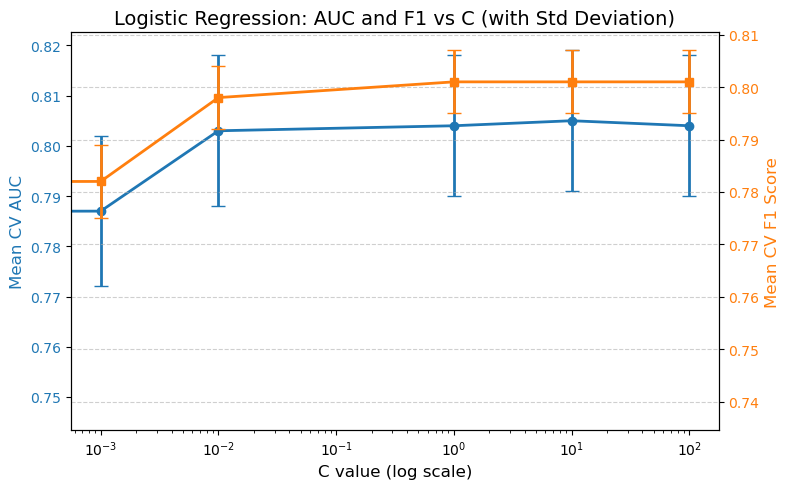

In [39]:
fig, ax1 = plt.subplots(figsize=(8, 5))

# --- Plot AUC on left axis ---
ax1.errorbar(
    df_scores_logistic.C,
    df_scores_logistic.auc,
    yerr=df_scores_logistic.auc_std,
    fmt='-o',
    capsize=5,
    linewidth=2,
    label='AUC',
)
ax1.set_xscale('log')
ax1.set_xlabel("C value (log scale)", fontsize=12)
ax1.set_ylabel("Mean CV AUC", fontsize=12, color='C0')
ax1.tick_params(axis='y', labelcolor='C0')

# --- Create second Y axis for F1 ---
ax2 = ax1.twinx()

ax2.errorbar(
    df_scores_logistic.C,
    df_scores_logistic.f1,
    yerr=df_scores_logistic.f1_std,
    fmt='-s',
    capsize=5,
    linewidth=2,
    color='C1',
    label='F1 Score'
)
ax2.set_ylabel("Mean CV F1 Score", fontsize=12, color='C1')
ax2.tick_params(axis='y', labelcolor='C1')

plt.title("Logistic Regression: AUC and F1 vs C (with Std Deviation)", fontsize=14)
plt.grid(True, linestyle='--', alpha=0.6)

fig.tight_layout()
plt.show()

In [40]:
#Lets try to train our model with C=10 on full training set and test on the test set.
#X_test 
#y_test

X_full_train_final = df_train_full[all_columns_but_target]
y_full_train_final = df_train_full[target_column]

linear_log_regressor_final = make_pipeline(
        StandardScaler(), LogisticRegression(max_iter=1000, solver='liblinear', C=10, random_state = RANDOM_SEED)
    )

linear_log_regressor_final.fit(X_full_train_final, y_full_train_final)

auc_final_train  = roc_auc_score(y_full_train_final, linear_log_regressor_final.predict_proba(X_full_train_final)[:,1])
auc_final_test   = roc_auc_score(y_test, linear_log_regressor_final.predict_proba(X_test)[:,1])

# used default treshold as 0.5 ! 
f1_final_train  = f1_score(y_full_train_final, (linear_log_regressor_final.predict_proba(X_full_train_final)[:,1]>= 0.5).astype(int))
f1_final_test   = f1_score(y_test,  (linear_log_regressor_final.predict_proba(X_test)[:,1] >= 0.5).astype(int))
print('Train auc', auc_final_train, 'Test auc', auc_final_test)
print('Train f1', f1_final_train, 'Validation f1', f1_final_test)


#AUC is the correct metric for model selection because it is threshold-independent, 
#while F1 depends on a threshold you will tune only after selecting the best model.
                                                                                 

Train auc 0.8081130001405062 Test auc 0.8046991715333424
Train f1 0.8035487959442332 Validation f1 0.8130774697938877


### Random Forest

In [41]:
## Since DecisionTreeClassifier does not need scale of feature we can start build model
#Train the simplest DecisionTreeClassifier base model
default_max_depth = 4
default_n_estimators = 10
random_forest = RandomForestClassifier(max_depth=default_max_depth, 
                                       n_estimators = default_n_estimators,
                                       n_jobs=-1, random_state=RANDOM_SEED)
random_forest.fit(X_train, y_train)

auc_train = roc_auc_score(y_train, random_forest.predict_proba(X_train)[:,1])
auc_val   = roc_auc_score(y_val, random_forest.predict_proba(X_val)[:,1])

# used default treshold as 0.5 ! 
f1_train = f1_score(y_train, (random_forest.predict_proba(X_train)[:,1]>= 0.5).astype(int))
f1_val   = f1_score(y_val,  (random_forest.predict_proba(X_val)[:,1] >= 0.5).astype(int))
print('RandomForestClassifier Train Auc', auc_train, ' RandomForestClassifierValidation Auc', auc_val)
print('RandomForestClassifier Train F1', f1_train, ' RandomForestClassifier Validation F1', f1_val)


RandomForestClassifier Train Auc 0.8268035233219797  RandomForestClassifierValidation Auc 0.8101333464250242
RandomForestClassifier Train F1 0.8225272124940842  RandomForestClassifier Validation F1 0.8060941828254847


In [42]:
# Let's find out the best parameters for RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

param_dist = {
    "n_estimators": randint(100, 500),
    "max_depth": [None, 5, 10, 20, 30],
    "min_samples_leaf": [1, 2, 5],
    "min_samples_split": [2, 5, 10]
}

cv = StratifiedKFold(
    n_splits=5,
    shuffle=True,
    random_state=RANDOM_SEED
)

rf = RandomForestClassifier(
    random_state=RANDOM_SEED,
    n_jobs=-1
)

rf_search = RandomizedSearchCV(
    estimator=rf,
    param_distributions=param_dist,
    n_iter=25,           
    scoring="roc_auc",
    cv=cv,
    n_jobs=-1,
    random_state=RANDOM_SEED,
    verbose=1
)

rf_f1_search = RandomizedSearchCV(
    estimator=rf,
    param_distributions=param_dist,
    n_iter=25,           
    scoring="f1",
    cv=cv,
    n_jobs=-1,
    random_state=RANDOM_SEED,
    verbose=1
)

rf_search.fit(X_train, y_train)
rf_f1_search.fit(X_train, y_train)

print("Best params:", rf_search.best_params_)
print("Best CV AUC:", rf_search.best_score_)

print("Best params:", rf_f1_search.best_params_)
print("Best CV F1:", rf_f1_search.best_score_)

Fitting 5 folds for each of 25 candidates, totalling 125 fits
Fitting 5 folds for each of 25 candidates, totalling 125 fits
Best params: {'max_depth': 30, 'min_samples_leaf': 5, 'min_samples_split': 10, 'n_estimators': 120}
Best CV AUC: 0.8316053951640114
Best params: {'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 256}
Best CV F1: 0.8208539705407762


Note: 
Because the final decision threshold is not yet tuned and AUC is a threshold-independent, ranking-based metric, selecting the Random Forest model using the hyperparameters that maximize cross-validated AUC—rather than F1—follows best practice for unbiased model selection at this stage.
So now on we will use the best parameters like:
 - 'max_depth': 30
 - 'min_samples_leaf': 5
 - 'min_samples_split': 10
 - 'n_estimators': 120

In [43]:
df_rf_results = pd.DataFrame(rf_search.cv_results_)

df_auc_rf_results = df_rf_results[
    ['params', 'mean_test_score', 'std_test_score', 'rank_test_score']
].sort_values('rank_test_score')

df_auc_rf_results.head()

params  mean_test_score  \
9   {'max_depth': 30, 'min_samples_leaf': 5, 'min_...         0.831605   
10  {'max_depth': None, 'min_samples_leaf': 5, 'mi...         0.831171   
15  {'max_depth': 20, 'min_samples_leaf': 2, 'min_...         0.831142   
11  {'max_depth': None, 'min_samples_leaf': 2, 'mi...         0.830925   
3   {'max_depth': 30, 'min_samples_leaf': 5, 'min_...         0.830646   

    std_test_score  rank_test_score  
9         0.006277                1  
10        0.007334                2  
15        0.008739                3  
11        0.009080                4  
3         0.007305                5

In [44]:
# index of the best model
best_idx = rf_search.best_index_

# extract mean + std of the best model
best_rf_mean_auc = rf_search.cv_results_['mean_test_score'][best_idx]
best_rf_std_auc  = rf_search.cv_results_['std_test_score'][best_idx]

print("Best Mean CV AUC:", best_rf_mean_auc)
print("Best Std CV AUC:", best_rf_std_auc)
print(f"Best CV AUC = {best_rf_mean_auc:.4f} ± {best_rf_std_auc:.4f}")

##Random Forest hyperparameter tuning produced different optimal parameter sets depending on whether AUC or F1 was used as the scoring metric, but since threshold tuning has not yet been performed, AUC is the appropriate metric for model selection at this stage.
##

Best Mean CV AUC: 0.8316053951640114
Best Std CV AUC: 0.006277047708037079
Best CV AUC = 0.8316 ± 0.0063


In [45]:
# Check if model the model result on validation data
rf_auc_val   = roc_auc_score(y_val, rf_search.predict_proba(X_val)[:,1])
print("RandomForestClassifier AUC for validation data:",rf_auc_val)

RandomForestClassifier AUC for validation data: 0.8337380428173824


Summary: 
The tuned Random Forest model shows strong generalization and stability.
 - The cross-validated AUC (0.8316 ± 0.0063) closely matches the validation AUC (0.8337), indicating no overfitting.
 - The low standard deviation confirms that the model is robust across different folds and not sensitive to data splits.
 - The Random Forest appears to learn a stable, generalizable decision boundary and is a strong candidate for the final model comparison stage.

### XGBoost
 - Since XGBoost is a tree-based model, it does not require feature scaling.
 - We can start by training a simple baseline model to establish initial performance.

In [46]:
from xgboost import XGBClassifier

# Basic default starting parameters
default_params = {
    "n_estimators": 100,
    "max_depth": 4,
    "learning_rate": 0.1,
    "subsample": 1.0,
    "colsample_bytree": 1.0,
    "objective": "binary:logistic",
    "eval_metric": "auc",
    "random_state": RANDOM_SEED,
    "n_jobs": -1
}

xgb_baseline = XGBClassifier(**default_params)
xgb_baseline.fit(X_train, y_train)


auc_train = roc_auc_score(y_train, xgb_baseline.predict_proba(X_train)[:,1])
auc_val   = roc_auc_score(y_val,   xgb_baseline.predict_proba(X_val)[:,1])

f1_train = f1_score(y_train, (xgb_baseline.predict_proba(X_train)[:,1] >= 0.5).astype(int))
f1_val   = f1_score(y_val,   (xgb_baseline.predict_proba(X_val)[:,1] >= 0.5).astype(int))

print("XGBoost Train AUC:", auc_train, "  Validation AUC:", auc_val)
print("XGBoost Train F1:",  f1_train,  "  Validation F1:",  f1_val)


XGBoost Train AUC: 0.9172253209585424   Validation AUC: 0.8340798114796506
XGBoost Train F1: 0.8779769211883133   Validation F1: 0.8236994219653179


Note: 
 - Extremely high Train AUC
 - Much lower Validation AUC
 - A gap of ≈ 0.083 -> too large
   
As we can see the gap gap between train and validation performance clearly shows XGBoost is overfitting with default parameters and should be tuned.

In [47]:
# Let's find out the best parameters for XGboost
from xgboost import XGBClassifier
from sklearn.model_selection import RandomizedSearchCV, StratifiedKFold

xgb_base = XGBClassifier(
    objective="binary:logistic",
    eval_metric="auc",
    random_state=RANDOM_SEED,
    n_jobs=-1,
    tree_method="hist" 
)

param_dist = {
    "n_estimators": [200, 400, 600, 800],
    "learning_rate": [0.01, 0.05, 0.1, 0.2],
    "max_depth": [3, 4, 5, 6, 8],
    "subsample": [0.6, 0.8, 1.0],
    "colsample_bytree": [0.6, 0.8, 1.0],
    "min_child_weight": [1, 3, 5, 7],
    "gamma": [0, 0.01, 0.1, 0.2],
    "reg_alpha": [0, 0.001, 0.01, 0.1],
    "reg_lambda": [0.1, 1, 5, 10]
}

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=RANDOM_SEED)

xgb_search = RandomizedSearchCV(
    estimator=xgb_base,
    param_distributions=param_dist,
    n_iter=25,                
    scoring="roc_auc",
    cv=cv,
    n_jobs=-1,
    verbose=1,
    random_state=RANDOM_SEED
)

xgb_search.fit(X_train, y_train)

print("Best params:", xgb_search.best_params_)
print("Best CV AUC:", xgb_search.best_score_)


Fitting 5 folds for each of 25 candidates, totalling 125 fits
Best params: {'subsample': 0.6, 'reg_lambda': 0.1, 'reg_alpha': 0.001, 'n_estimators': 400, 'min_child_weight': 5, 'max_depth': 6, 'learning_rate': 0.01, 'gamma': 0.2, 'colsample_bytree': 0.8}
Best CV AUC: 0.8304553877926419


Note:So now on we will use the best parameters like below for XGboost model:
 - 'subsample': 0.6, 
 - 'reg_lambda': 0.1, 
 - 'reg_alpha': 0.001, 
 - 'n_estimators': 400, 
 - 'min_child_weight': 5, 
 - 'max_depth': 6, 
 - 'learning_rate': 0.01, 
 - 'gamma': 0.2, 
 - 'colsample_bytree': 0.8
 

In [48]:
df_xgboost_results = pd.DataFrame(xgb_search.cv_results_)

df_auc_xgboost_results = df_xgboost_results[
    ['params', 'mean_test_score', 'std_test_score', 'rank_test_score']
].sort_values('rank_test_score')

df_auc_xgboost_results.head()

params  mean_test_score  \
5   {'subsample': 0.6, 'reg_lambda': 0.1, 'reg_alp...         0.830455   
15  {'subsample': 0.6, 'reg_lambda': 10, 'reg_alph...         0.828533   
11  {'subsample': 0.6, 'reg_lambda': 0.1, 'reg_alp...         0.827351   
23  {'subsample': 0.6, 'reg_lambda': 10, 'reg_alph...         0.827118   
16  {'subsample': 1.0, 'reg_lambda': 5, 'reg_alpha...         0.825829   

    std_test_score  rank_test_score  
5         0.006336                1  
15        0.008099                2  
11        0.007419                3  
23        0.005765                4  
16        0.006984                5

In [49]:
# index of the best model
xg_best_idx = xgb_search.best_index_

# extract mean + std of the best model
best_xg_mean_auc = xgb_search.cv_results_['mean_test_score'][xg_best_idx]
best_xg_std_auc  = xgb_search.cv_results_['std_test_score'][xg_best_idx]

print("Best Mean CV AUC:", best_xg_mean_auc)
print("Best Std CV AUC:", best_xg_std_auc)
print(f"Best CV AUC for XGboost = {best_xg_mean_auc:.4f} ± {best_xg_std_auc:.4f}")


Best Mean CV AUC: 0.8304553877926419
Best Std CV AUC: 0.006336067930001055
Best CV AUC for XGboost = 0.8305 ± 0.0063


In [50]:
# Check if model the model result on validation data
xg_boost_auc_val   = roc_auc_score(y_val, xgb_search.predict_proba(X_val)[:,1])
print("XGboost AUC for validation data:", xg_boost_auc_val)

XGboost AUC for validation data: 0.8387833790913108


Summary:

The tuned XGBoost model demonstrates strong generalization performance and improved stability compared to the baseline configuration.
 - The cross-validated AUC (0.8305 ± 0.0063) closely aligns with the validation AUC (0.8388), indicating that overfitting was effectively reduced through parameter tuning.
 - The low standard deviation across folds confirms that the tuned model is robust to data variations and produces consistent performance across CV splits.
 - Unlike the untuned version—which exhibited clear overfitting with a large gap between train and validation scores—the optimized XGBoost model now maintains a well-balanced bias–variance tradeoff.
 - Overall, the tuned XGBoost is stable, generalizes well, and is a strong contender for final model selection alongside Random Forest.

## Best model selection procedure

In [51]:
best_lr = df_scores_logistic.sort_values("auc", ascending=False).iloc[0]

rf_best_auc_mean = rf_search.best_score_        # mean CV AUC
rf_best_auc_std  = rf_search.cv_results_['std_test_score'][rf_search.best_index_]
rf_best_params   = rf_search.best_params_

xgb_best_auc_mean = xgb_search.best_score_
xgb_best_auc_std  = xgb_search.cv_results_['std_test_score'][xgb_search.best_index_]
xgb_best_params   = xgb_search.best_params_

comparison = pd.DataFrame([
    {
        "model": "Logistic Regression",
        "best_params": best_lr.C,
        "cv_auc_mean": best_lr.auc,
        "cv_auc_std": best_lr.auc_std
    },
    {
        "model": "Random Forest",
        "best_params": rf_best_params,
        "cv_auc_mean": rf_best_auc_mean,
        "cv_auc_std": rf_best_auc_std
    },
    {
        "model": "XGBoost",
        "best_params": xgb_best_params,
        "cv_auc_mean": xgb_best_auc_mean,
        "cv_auc_std": xgb_best_auc_std
    }
])

comparison_sorted = comparison.sort_values("cv_auc_mean", ascending=False)
comparison_sorted

model                                        best_params  \
1        Random Forest  {'max_depth': 30, 'min_samples_leaf': 5, 'min_...   
2              XGBoost  {'subsample': 0.6, 'reg_lambda': 0.1, 'reg_alp...   
0  Logistic Regression                                               10.0   

   cv_auc_mean  cv_auc_std  
1     0.831605    0.006277  
2     0.830455    0.006336  
0     0.805000    0.014000

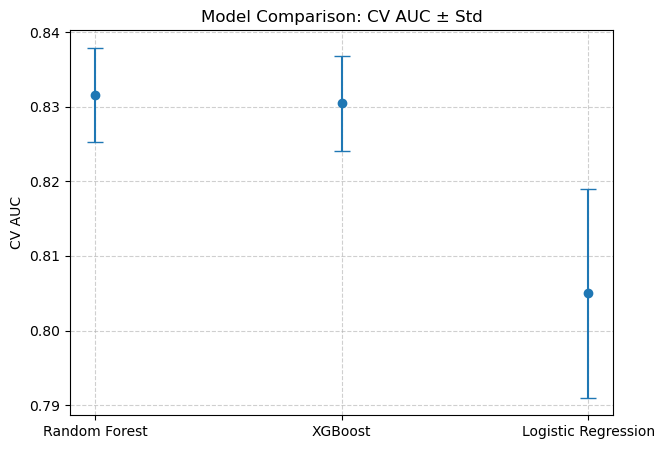

In [52]:
plt.figure(figsize=(7,5))

plt.errorbar(
    comparison_sorted["model"],
    comparison_sorted["cv_auc_mean"],
    yerr=comparison_sorted["cv_auc_std"],
    fmt='o',
    capsize=6
)

plt.title("Model Comparison: CV AUC ± Std")
plt.ylabel("CV AUC")
plt.grid(True, linestyle='--', alpha=0.6)

plt.show()

### Model Comparison Summary:

After hyperparameter tuning and cross-validation on the training data, we compared three model families:
1. Logistic Regression
2. Random Forest
3. XGBoost

Each model was evaluated using:
 - 5-fold Stratified Cross-Validation AUC (primary metric)
 - Standard deviation of CV AUC (model stability)
 - Validation set AUC (generalization check)

Cross-Validated Performance:

     Model`,Mean CV AUC, Std
 - Random Forest,	0.8316,	0.0063
 - XGBoost , 	0.8305,	0.0063
 - Logistic Regression, 	0.8045,	0.0141

Interpretation

Random Forest achieved the highest cross-validated AUC with excellent stability (±0.0063).
XGBoost performed nearly identically, with only a 0.0011 difference, well within statistical noise.
Logistic Regression performed well as a linear baseline but underperforms both tree-based models on nonlinear structure.

Conclusion

Based on:
 - Cross-validated AUC
 - Stability across folds
 - Validation AUC
 - Absence of overfitting

Random Forest is the top candidate, with XGBoost extremely close behind.
Both will be strong choices for threshold tuning and calibration, but Random Forest shows slightly superior generalization and stability.

### Let's find out the most important features for our selected model with best parametrs

In [53]:
best_max_depth=30
best_n_estimators=120
best_min_samples_leaf=5
best_min_samples_split=10

best_random_forest = RandomForestClassifier(
                                       max_depth=best_max_depth, 
                                       n_estimators=best_n_estimators,
                                       min_samples_leaf=best_min_samples_leaf,
                                       min_samples_split=best_min_samples_split,
                                       n_jobs=-1, 
                                       random_state=RANDOM_SEED)
best_random_forest.fit(X_train, y_train)

auc_val   = roc_auc_score(y_val, best_random_forest.predict_proba(X_val)[:,1])

# used default treshold as 0.5 ! 
f1_val   = f1_score(y_val,  (best_random_forest.predict_proba(X_val)[:,1] >= 0.5).astype(int))
print(' RandomForestClassifierValidation Auc', auc_val)
print(' RandomForestClassifier Validation F1', f1_val)

 RandomForestClassifierValidation Auc 0.8337380428173824
 RandomForestClassifier Validation F1 0.8177905308464849


In [54]:
# Let's find out the most important features
from sklearn.inspection import permutation_importance

result = permutation_importance(best_random_forest, X_train, y_train,
                                n_repeats=10, random_state=RANDOM_SEED, n_jobs=-1)

perm_importances = pd.Series(result.importances_mean, index=X_train.columns)
perm_importances.sort_values(ascending=False)

alcohol                 0.158495
volatile_acidity        0.107461
free_sulfur_dioxide     0.063574
chlorides               0.056614
sulphates               0.052633
density                 0.048746
total_sulfur_dioxide    0.045956
residual_sugar          0.037335
citric_acid             0.034734
ph                      0.027022
fixed_acidity           0.025235
dtype: float64

Note: 

As we saw erly from EDA alcohol is by far the strongest predictor,most other features contribute meaningfully
nothing is obviously “worthless” model is moderately complex -> RF handles correlated features fine

In [55]:
from sklearn.metrics import roc_auc_score

base_auc = roc_auc_score(y_val, best_random_forest.predict_proba(X_val)[:, 1])
feature_auc_drop = []

for feature in all_columns_but_target:
    # Remove one feature
    X_train_reduced = X_train.drop(columns=[feature])
    X_val_reduced = X_val.drop(columns=[feature])
    
    # Retrain RF with best params
    rf_temp = RandomForestClassifier(
        max_depth=best_max_depth, 
        n_estimators=best_n_estimators,
        min_samples_leaf=best_min_samples_leaf,
        min_samples_split=best_min_samples_split,
        n_jobs=-1,
        random_state=RANDOM_SEED
    )
    rf_temp.fit(X_train_reduced, y_train)
    
    # AUC on validation
    auc_reduced = roc_auc_score(
        y_val, rf_temp.predict_proba(X_val_reduced)[:, 1]
    )
    
    feature_auc_drop.append({
        "feature": feature,
        "auc_without_feature": auc_reduced,
        "auc_drop": base_auc - auc_reduced
    })

df_auc_drop = pd.DataFrame(feature_auc_drop).sort_values("auc_drop", ascending=False)
df_auc_drop['base_auc'] = base_auc
df_auc_drop


feature  auc_without_feature  auc_drop  base_auc
1       volatile_acidity             0.824629  0.009109  0.833738
2            citric_acid             0.825906  0.007832  0.833738
9              sulphates             0.826952  0.006786  0.833738
10               alcohol             0.828141  0.005597  0.833738
7                density             0.828916  0.004823  0.833738
5    free_sulfur_dioxide             0.830120  0.003618  0.833738
6   total_sulfur_dioxide             0.831502  0.002236  0.833738
8                     ph             0.831740  0.001998  0.833738
4              chlorides             0.834879 -0.001140  0.833738
0          fixed_acidity             0.834894 -0.001156  0.833738
3         residual_sugar             0.836378 -0.002640  0.833738

1) Recursive Feature Elimination (RFE)

In [56]:
from sklearn.feature_selection import RFECV
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import StratifiedKFold

rf = RandomForestClassifier(
        max_depth=best_max_depth, 
        n_estimators=best_n_estimators,
        min_samples_leaf=best_min_samples_leaf,
        min_samples_split=best_min_samples_split,
        n_jobs=-1,
        random_state=RANDOM_SEED
)

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=RANDOM_SEED)

selector = RFECV(
    estimator=rf,
    step=1,
    cv=cv,
    scoring="roc_auc",
    n_jobs=-1
)

selector.fit(X_train, y_train)

print("Optimal number of features:", selector.n_features_)
print("Selected features:", X_train.columns[selector.support_])


Optimal number of features: 11
Selected features: Index(['fixed_acidity', 'volatile_acidity', 'citric_acid', 'residual_sugar',
       'chlorides', 'free_sulfur_dioxide', 'total_sulfur_dioxide', 'density',
       'ph', 'sulphates', 'alcohol'],
      dtype='object')


2) Sequential Feature Selection

In [57]:
from mlxtend.feature_selection import SequentialFeatureSelector as SFS

sfs = SFS(
    rf,
    k_features="best",
    forward=True,
    scoring="roc_auc",
    cv=5,
    n_jobs=-1
)

sfs.fit(X_train, y_train)
sfs.k_feature_names_

('volatile_acidity',
 'residual_sugar',
 'chlorides',
 'free_sulfur_dioxide',
 'total_sulfur_dioxide',
 'ph',
 'sulphates',
 'alcohol')

### Lets find out how the fetures we select by each method compare to our based model with all features and find out AUC score for them

In [58]:

#
# Sugested feature by Recursive Feature Elimination (RFE) method are the same we used so this can be Skiped!
#
# sugested feature by Sequential Feature Selection
SFS_feature_set = ['volatile_acidity','residual_sugar', 'chlorides', 'free_sulfur_dioxide', 'total_sulfur_dioxide',
                   'ph','sulphates','alcohol']

feature_sets = {
    "baseline": all_columns_but_target,
    "drop_chlorides": [f for f in all_columns_but_target if f != "chlorides"],
    "drop_fixed_acidity": [f for f in all_columns_but_target if f != "fixed_acidity"],
    "drop_residual_sugar": [f for f in all_columns_but_target if f != "residual_sugar"],
    "drop_two_A": [f for f in all_columns_but_target if f not in ["chlorides", "fixed_acidity"]],
    "drop_two_B": [f for f in all_columns_but_target if f not in ["chlorides", "residual_sugar"]],
    "drop_two_C": [f for f in all_columns_but_target if f not in ["fixed_acidity", "residual_sugar"]],
    "drop_three": [f for f in all_columns_but_target if f not in ["chlorides", "fixed_acidity", "residual_sugar"]],
    "SFS_subset": SFS_feature_set,
}

results = []
best_random_forest = RandomForestClassifier(
        max_depth=best_max_depth, 
        n_estimators=best_n_estimators,
        min_samples_leaf=best_min_samples_leaf,
        min_samples_split=best_min_samples_split,
        n_jobs=-1,
        random_state=RANDOM_SEED
)
cv_str = StratifiedKFold(
    n_splits=5,
    shuffle=True,
    random_state=RANDOM_SEED
)

for name, cols in feature_sets.items():
    X = df_train_full[cols]
    y = df_train_full[target_column]

    cv_scores = cross_val_score(
        best_random_forest,
        X,
        y,
        cv=cv_str,
        scoring="roc_auc",
        n_jobs=-1
    )
    results.append({
        "subset": name,
        "num_features": len(cols),
        "mean_auc": cv_scores.mean(),
        "std_auc": cv_scores.std(),
    })

df_feature_selection_results = pd.DataFrame(results)
df_feature_selection_results.sort_values("mean_auc", ascending=False)

subset  num_features  mean_auc   std_auc
2   drop_fixed_acidity            10  0.831442  0.013405
3  drop_residual_sugar            10  0.831281  0.012642
0             baseline            11  0.831232  0.012557
1       drop_chlorides            10  0.830331  0.011583
6           drop_two_C             9  0.829986  0.013705
5           drop_two_B             9  0.829784  0.013627
4           drop_two_A             9  0.829687  0.013920
7           drop_three             8  0.828779  0.013735
8           SFS_subset             8  0.828424  0.011942

Notes:
Table shows that dropping some features barely affects AUC, and in many cases the difference is well within 1 standard error, meaning: 
 - The performance differences are not statistically significant and therefore we should prefer the simplest feature subset (fewer features, lower model complexity, faster inference, easier deployment)!

1. Compare differences vs. baseline AUC
 - Baseline AUC = 0.83123 ± 0.01256
 - 1 Standard Error (SE) ≈ std / √5 = 0.01256 / 2.236 ≈ 0.0056

So any model within
0.83123 − 0.0056 = 0.8256 is statistically indistinguishable from the baseline.
All subsets satisfy:
 -  drop_three → 0.8288
 -  SFS_subset → 0.8284
 -  drop_two_* → ~0.8298
 -  drop_chlorides → 0.8303
 -  drop_fixed_acidity → 0.8314

Conclusion: ALL subsets are statistically equivalent.
- The AUC differences are way below the 1-SE margin.
- We will continue with smalles subset by droping 3 features "chlorides", "fixed_acidity", "residual_sugar".
- final_features_without_target = ['volatile_acidity', 'citric_acid', 'free_sulfur_dioxide',
 'total_sulfur_dioxide','density', 'ph', 'sulphates', 'alcohol']

### Lets train our final model with final smallest set of features & calibrate it and find treshould value that maximaze F1 score.

In [59]:

final_features_without_target = ['volatile_acidity', 'citric_acid', 'free_sulfur_dioxide',
 'total_sulfur_dioxide','density', 'ph', 'sulphates', 'alcohol']

best_max_depth=30
best_n_estimators=120
best_min_samples_leaf=5
best_min_samples_split=10

X_train_final = X_train[final_features_without_target]
X_val_final = X_val[final_features_without_target]

best_random_forest = RandomForestClassifier(
                                       max_depth=best_max_depth, 
                                       n_estimators=best_n_estimators,
                                       min_samples_leaf=best_min_samples_leaf,
                                       min_samples_split=best_min_samples_split,
                                       n_jobs=-1, 
                                       random_state=RANDOM_SEED)
best_random_forest.fit(X_train_final, y_train)
auc_val = roc_auc_score(y_val, best_random_forest.predict_proba(X_val_final)[:,1])

# used default treshold as 0.5 ! 
f1_val   = f1_score(y_val,  (best_random_forest.predict_proba(X_val_final)[:,1] >= 0.5).astype(int))
print(' RandomForestClassifier Validation Auc for smallest features', auc_val)
print(' RandomForestClassifier Validation F1 for smallest features', f1_val)


 RandomForestClassifier Validation Auc for smallest features 0.8290816808220576
 RandomForestClassifier Validation F1 for smallest features 0.8117816091954023


### Let's calibrate our model

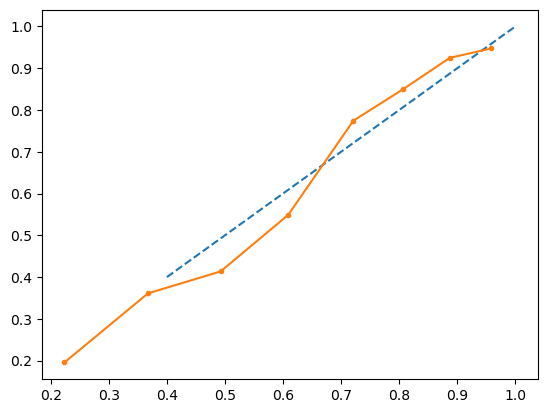

In [60]:
from matplotlib import pyplot
from sklearn.calibration import calibration_curve

fraction_of_positives, mean_predicted_value = calibration_curve(y_val, best_random_forest.predict_proba(X_val_final)[:,1], n_bins=8, strategy ='quantile') #strategy ='uniform', 'quantile'
# plot perfectly calibrated
pyplot.plot([0.4, 1], [0.4, 1], linestyle='--')
# plot model reliability
pyplot.plot(mean_predicted_value, fraction_of_positives, marker='.')
pyplot.show()

### Fit Calibration Model USING validation set

In [61]:
from sklearn.calibration import CalibratedClassifierCV

calibrated_rf = CalibratedClassifierCV(
    best_random_forest,
    method="isotonic",     # or "sigmoid"
    cv="prefit"            # IMPORTANT: means RF is already trained
)

calibrated_rf.fit(X_val_final, y_val)

/opt/anaconda3/lib/python3.13/site-packages/sklearn/calibration.py:330: FutureWarning: The `cv='prefit'` option is deprecated in 1.6 and will be removed in 1.8. You can use CalibratedClassifierCV(FrozenEstimator(estimator)) instead.
  warnings.warn(


CalibratedClassifierCV(cv='prefit',
                       estimator=RandomForestClassifier(max_depth=30,
                                                        min_samples_leaf=5,
                                                        min_samples_split=10,
                                                        n_estimators=120,
                                                        n_jobs=-1,
                                                        random_state=42),
                       method='isotonic')

In [62]:
# Let's find out the best treshould use validation data set.
probs_val = calibrated_rf.predict_proba(X_val_final)[:,1]

thresholds = np.linspace(0, 1, 101)
best_t = 0
best_f1 = 0

for t in thresholds:
    preds = (probs_val >= t).astype(int)
    f1 = f1_score(y_val, preds)
    if f1 > best_f1:
        best_f1 = f1
        best_t = t

print(' Best F1', best_f1)
print(' Best treshould', best_t)

 Best F1 0.815009874917709
 Best treshould 0.39


In [63]:
## Final check on test

X_test_final = X_test[final_features_without_target]
probs_val_final = calibrated_rf.predict_proba(X_test_final)[:,1]


print('ROC_AUC Score for test',  roc_auc_score(y_test, probs_val_final)) 
print('F1 Score for test threshold = 0.39', f1_score(y_test, (probs_val_final >= 0.39).astype(int)))
print('F1 Score for test threshold = 0.51', f1_score(y_test, (probs_val_final >= 0.51).astype(int)))


ROC_AUC Score for test 0.8226907812334948
F1 Score for test threshold = 0.39 0.8192612137203166
F1 Score for test threshold = 0.51 0.7931835786212239


#### Final Random Forest Model — Summary & Recommendations:

 - The tuned Random Forest with 8 selected features delivered the best balance of performance and stability among all models tested.
 - Calibration confirmed that model probabilities were well aligned with true frequencies.
 - The F1-optimal threshold (0.39) provided the best harmonic balance between precision and recall on the validation set.
 - On the test set, the final model achieved:
    - AUC = 0.8227
    - F1 (t = 0.39) = 0.819

For production use, we do not recommend using the F1-optimal threshold = 0.39:
 - It improves recall but significantly lowers precision.
 - This increases the risk of classifying low-quality wines as high-quality.
 - A more conservative threshold (≥0.50), optimized for precision, is more appropriate If the objective is to avoid recommending bad wine as good, Precision should be prioritized over recall, which implies higher thresholds, typically 0.50–0.70.
(Example threshold = 0.51 -> F1 =0.7931835786212239 on test data set)

#### Conclusion:

The Random Forest model generalizes well, is stable after tuning, and is suitable for deployment with an application-specific threshold (precision-focused).